In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
iris = pd.read_csv('./data/iris.data', sep=',', header=None)

In [38]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


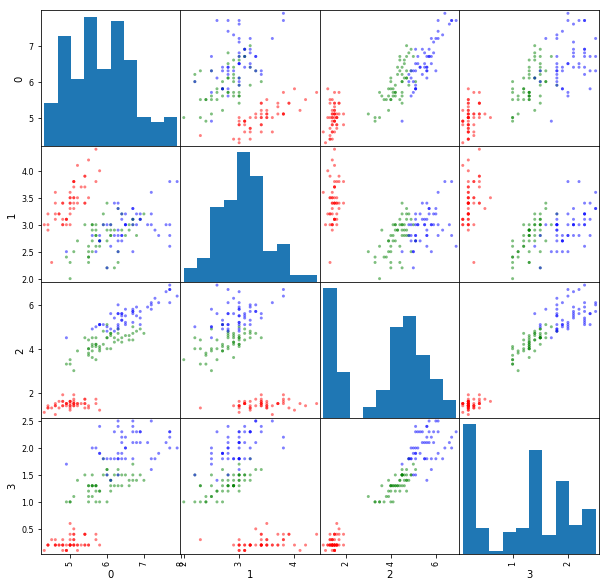

In [39]:
temp_series = iris[4]
np.unique(temp_series)
c = temp_series.replace(np.unique(temp_series), ['r','g','b'])
_ = pd.plotting.scatter_matrix(iris, figsize=(10,10), c=c)

In [40]:
X = iris.values[:, 0:4].astype(np.float32)
y = iris[4]

In [41]:
y.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: 4, dtype: int64

In [42]:
# y.unique()
# y.replace(y.unique(), [0,1,2])
# X_train, X_test, y_train, y_test = train_test_split(X, y.replace(y.unique(), [0,1,2]))
X_train, X_test, y_train, y_test = train_test_split(X, y)



In [43]:
logreg = LogisticRegression(C=1)


In [44]:
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### score 함수 설명
계수 R ^ 2는 (1 - u / v)로 정의되며, 
<br>여기서 u는 제곱의 잔여 합 ((y_true - y_pred) ** 2) .sum ()
<br>v는 제곱의 총합 (y_true - y_true.mean ()) ** 2) .sum ()
<br>가능한 가장 좋은 점수는 1.0이며 음수 일 수 있습니다 (모델이 임의로 악화 될 수 있기 때문에)

In [45]:
logreg.score(X_test, y_test)

0.9736842105263158

In [61]:
#iris.values[0]    #array([5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], dtype=object)
logreg.predict(np.array([5.1, 3.5, 1.4, 0.2]).reshape(1, -1))  # Iris-setosa 로 예측함

array(['Iris-setosa'], dtype=object)

In [62]:
y_pred_proba = logreg.predict_proba(X_test)

In [64]:
DataFrame(y_pred_proba).head()  

,0,1,2
0,0.000906,0.439252,0.559842
1,0.000516,0.278136,0.721348
2,0.007443,0.337361,0.655197
3,0.064201,0.702006,0.233793
4,0.874826,0.125036,0.000138


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
C_range = [0.001, 0.01, 0.1, 1., 10., 100., 1000.]

In [67]:
Xstd = StandardScaler().fit_transform(X)
X_train, X_test, Xstd_train, Xstd_test, y_train, y_test = train_test_split(X, Xstd, y)

In [68]:
results = []
for C in C_range:
    model = LogisticRegression(C=C)
    
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)    
    
    model.fit(Xstd_train, y_train)
    train_std_score = model.score(Xstd_train, y_train)
    test_std_score = model.score(Xstd_test, y_test)
    
    results.append((
        train_score, test_score, 
        train_std_score, test_std_score))    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [69]:
results = DataFrame(
    results, columns=['train', 'test', 'train_std', 'test_std'])
results.index = C_range

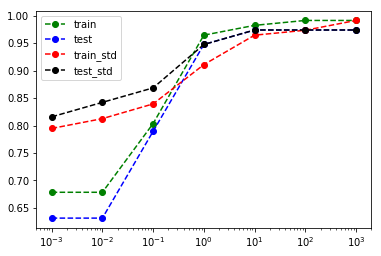

In [70]:
results.plot(logx=True, style=['go--', 'bo--', 'ro--', 'ko--'])

## SVM (Support Vector Machine)

In [71]:
from sklearn.svm import SVC

In [72]:
model = SVC(kernel='linear')
# model = SVC()


In [73]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
model.score(X_test,y_test)

0.9736842105263158

In [75]:
svc_rbf = SVC(kernel='rbf')

In [76]:
svc_rbf.fit(X_train, y_train)

svc_rbf.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9736842105263158

## SGD(Stochastic Gradinet Decent)알고리즘 적용

In [77]:
from sklearn.linear_model import SGDClassifier

In [81]:
#model = SGDClassifier(loss='perceptron') #퍼셉트론
model = SGDClassifier(loss='log')   #로지스틱회귀 사용
#model = SGDClassifier(loss='hinge') #svm

In [82]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.6052631578947368

## 의사결정트리

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [85]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9736842105263158

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
model = KNeighborsClassifier(n_neighbors=5, p=2) #5개의 이웃과의 거리를 기준으로 분류

In [88]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9736842105263158

In [89]:
from tensorflow.python.client import device_lib

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [90]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10604275344169308375]